# Machine Learning Examples

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib as mpl
import matplotlib.pyplot as plt
# matplotlib에서 한글 폰트 사용하기 위한 셋팅
import matplotlib.font_manager as font_manager
path = 'C:\\Windows\\Fonts\\malgun.ttf'
fontprop = font_manager.FontProperties(fname=path)
mpl.rcParams['font.family'] = fontprop.get_name()
# 한글 font 사용 시, 마이너스 글자가 깨지는 현상 해결
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
df_2014 = pd.read_csv('2014_traffic_accident.csv', encoding='cp949')
df_2015 = pd.read_csv('2015_traffic_accident.csv', encoding='cp949')
df_2016 = pd.read_csv('2016_traffic_accident.csv', encoding='cp949')
# 각 데이터 프레임 하나로 붙이기
df1 = pd.concat([df_2014, df_2015, df_2016], ignore_index=True).set_index('구분')
df1.head(15)

사고(건)  사망(명)  부상(명)
구분                           
2014년1월     169      7    347
2014년2월     145      3    268
2014년3월     206     12    358
2014년4월     182      4    360
2014년5월     218     17    474
2014년6월     233     13    457
2014년7월     229     14    431
2014년8월     222      9    447
2014년9월     225     15    430
2014년10월    210     14    392
2014년11월    209     10    386
2014년12월    178     12    329
2015년1월     205      8    375
2015년2월     175      8    375
2015년3월     237      4    492

In [3]:
df2 = df1.copy()
# df1의 인덱스 정보를 datetime 로 변경
df2.index = pd.to_datetime(df2.index, format='%Y년%m월')

DatetimeIndex(['2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01',
               '2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01'],
              dtype='datetime64[ns]', name='구분', freq=None)

In [5]:
df2.head(10)

사고(건)  사망(명)  부상(명)
구분                             
2014-01-01    169      7    347
2014-02-01    145      3    268
2014-03-01    206     12    358
2014-04-01    182      4    360
2014-05-01    218     17    474
2014-06-01    233     13    457
2014-07-01    229     14    431
2014-08-01    222      9    447
2014-09-01    225     15    430
2014-10-01    210     14    392

In [7]:
df2 = df2.set_index([df2.index.year, df2.index.month])
df2.head(10)

사고(건)  사망(명)  부상(명)
구분   구분                     
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392

In [8]:
df2.index.names = ['년도', '월']
df2.head(10)

사고(건)  사망(명)  부상(명)
년도   월                      
2014 1     169      7    347
     2     145      3    268
     3     206     12    358
     4     182      4    360
     5     218     17    474
     6     233     13    457
     7     229     14    431
     8     222      9    447
     9     225     15    430
     10    210     14    392

In [11]:
df2.groupby('년도')['사망(명)'].mean()

년도
2014    10.833333
2015     9.000000
2016     8.166667
Name: 사망(명), dtype: float64

In [14]:
df2.loc[2016]['사망(명)'].sum() / df2.loc[2016]['사고(건)'].sum() # 2016년 사고 건수 대비 사망자 비율

0.04027949034114262

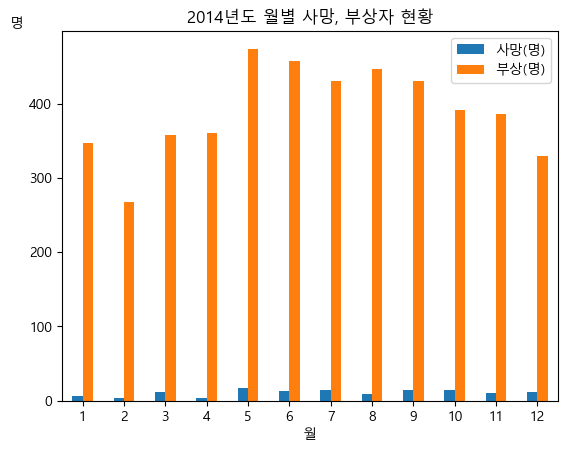

In [28]:
df2.loc[2014][['사망(명)', '부상(명)']].plot(kind='bar', rot=0)
plt.title('2014년도 월별 사망, 부상자 현황')
plt.ylabel('명', rotation=0, loc='top')
plt.show()

In [2]:
import seaborn as sns

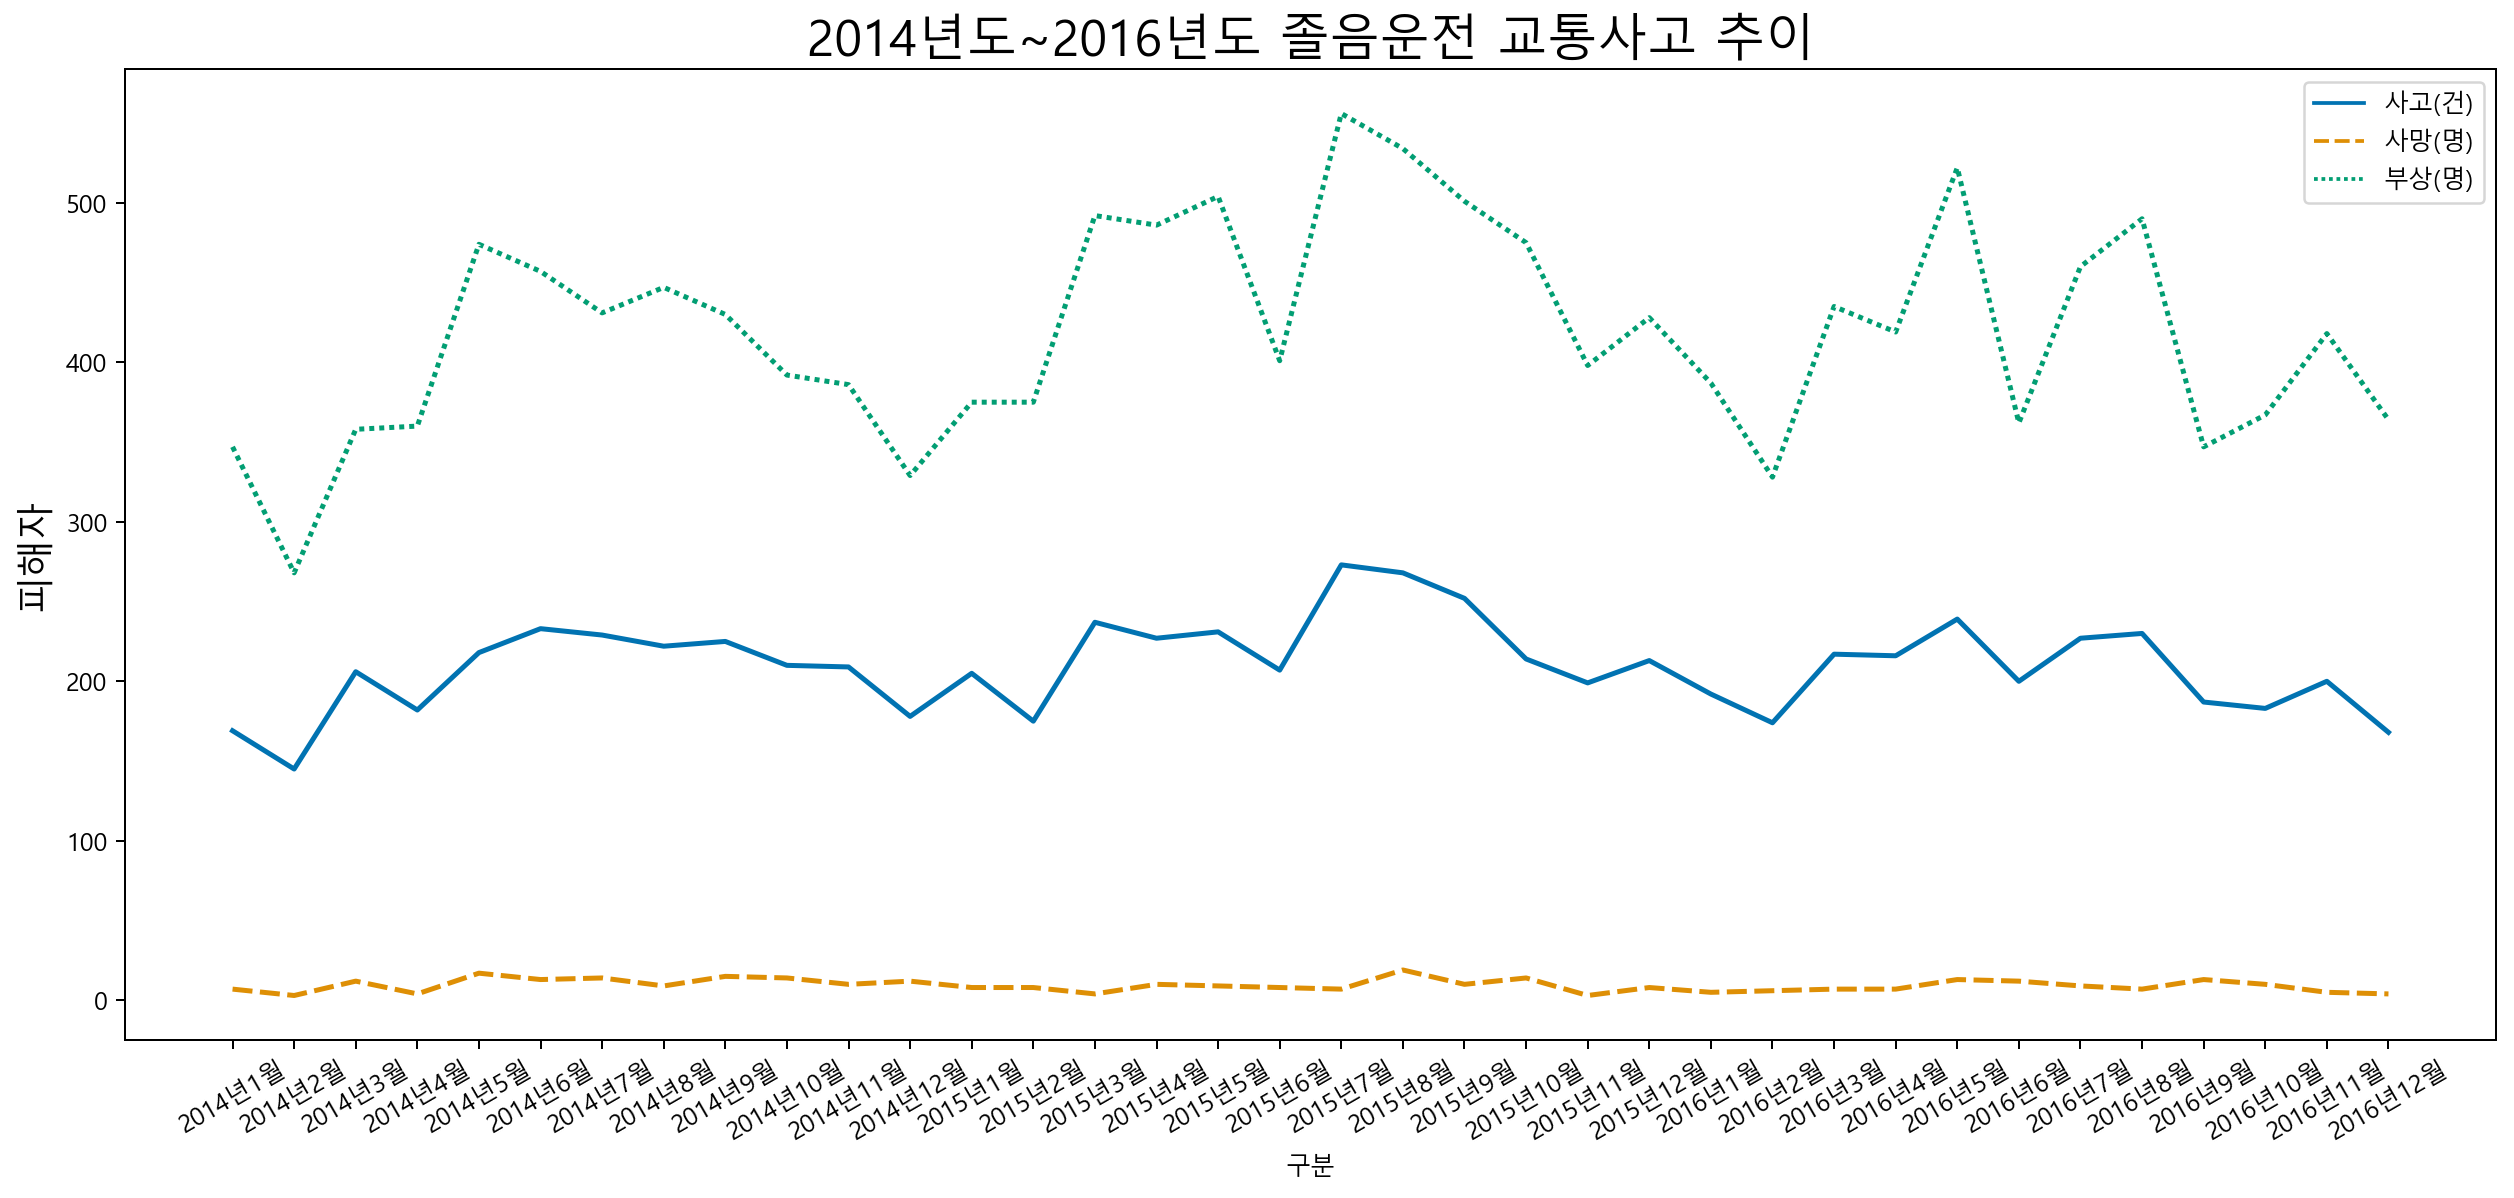

In [38]:
plt.figure(figsize=(17, 7), dpi=180)
sns.lineplot(data=df1, palette='colorblind', linewidth=2)
plt.title('2014년도~2016년도 졸음운전 교통사고 추이', fontsize=20)
plt.xticks(rotation=30)
plt.ylabel('피해자', fontsize=15)
plt.show()

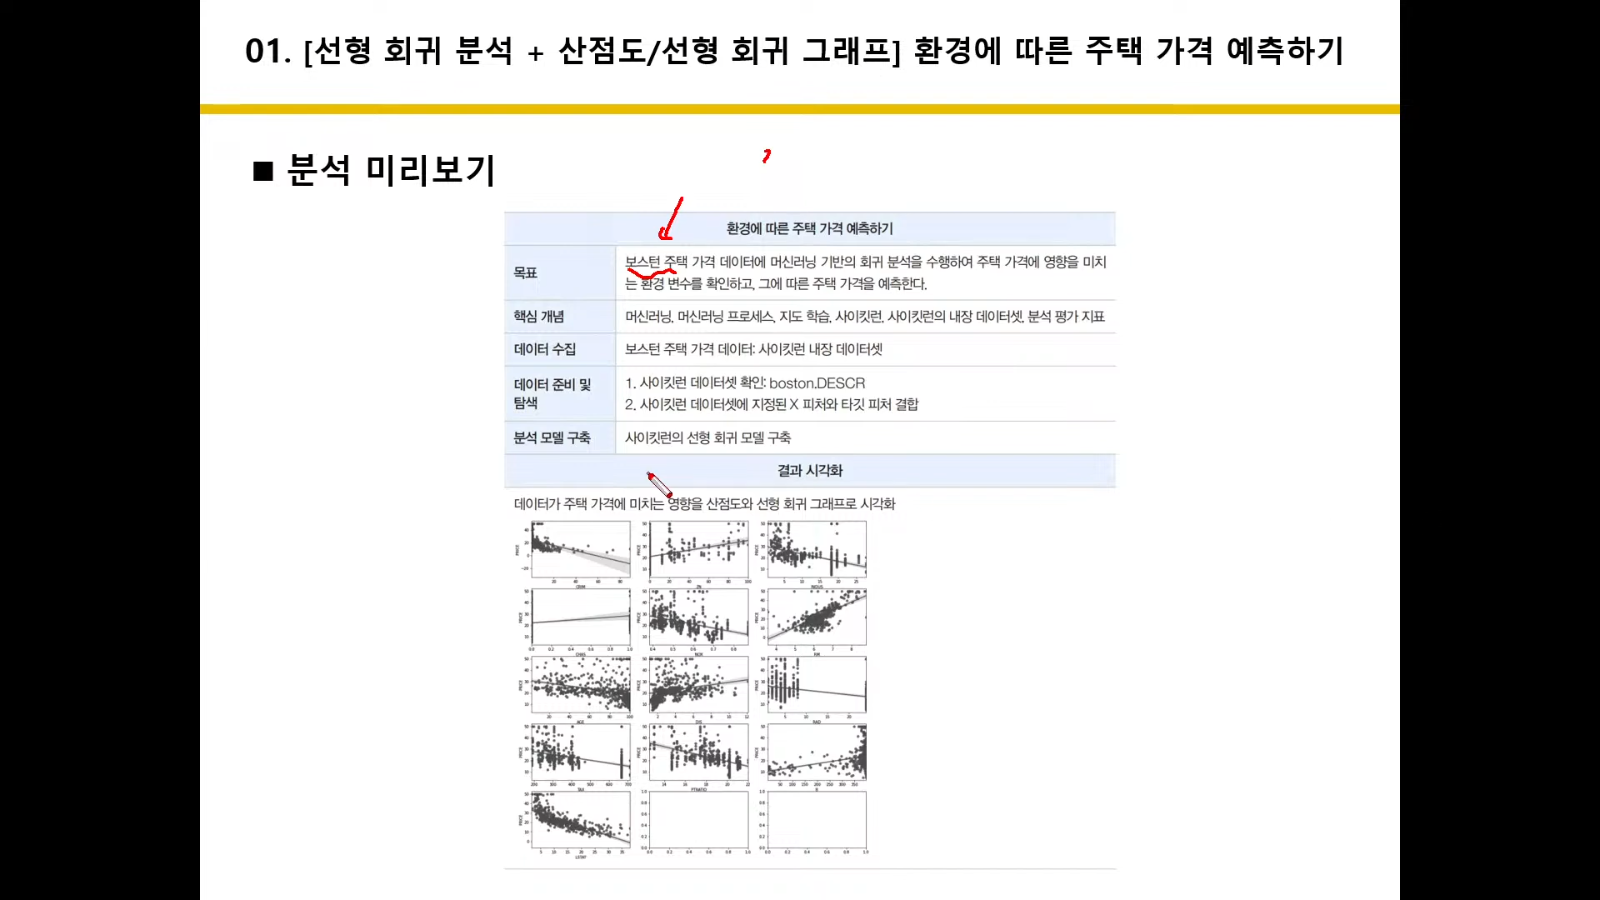

In [39]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.data

C:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [40]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [42]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

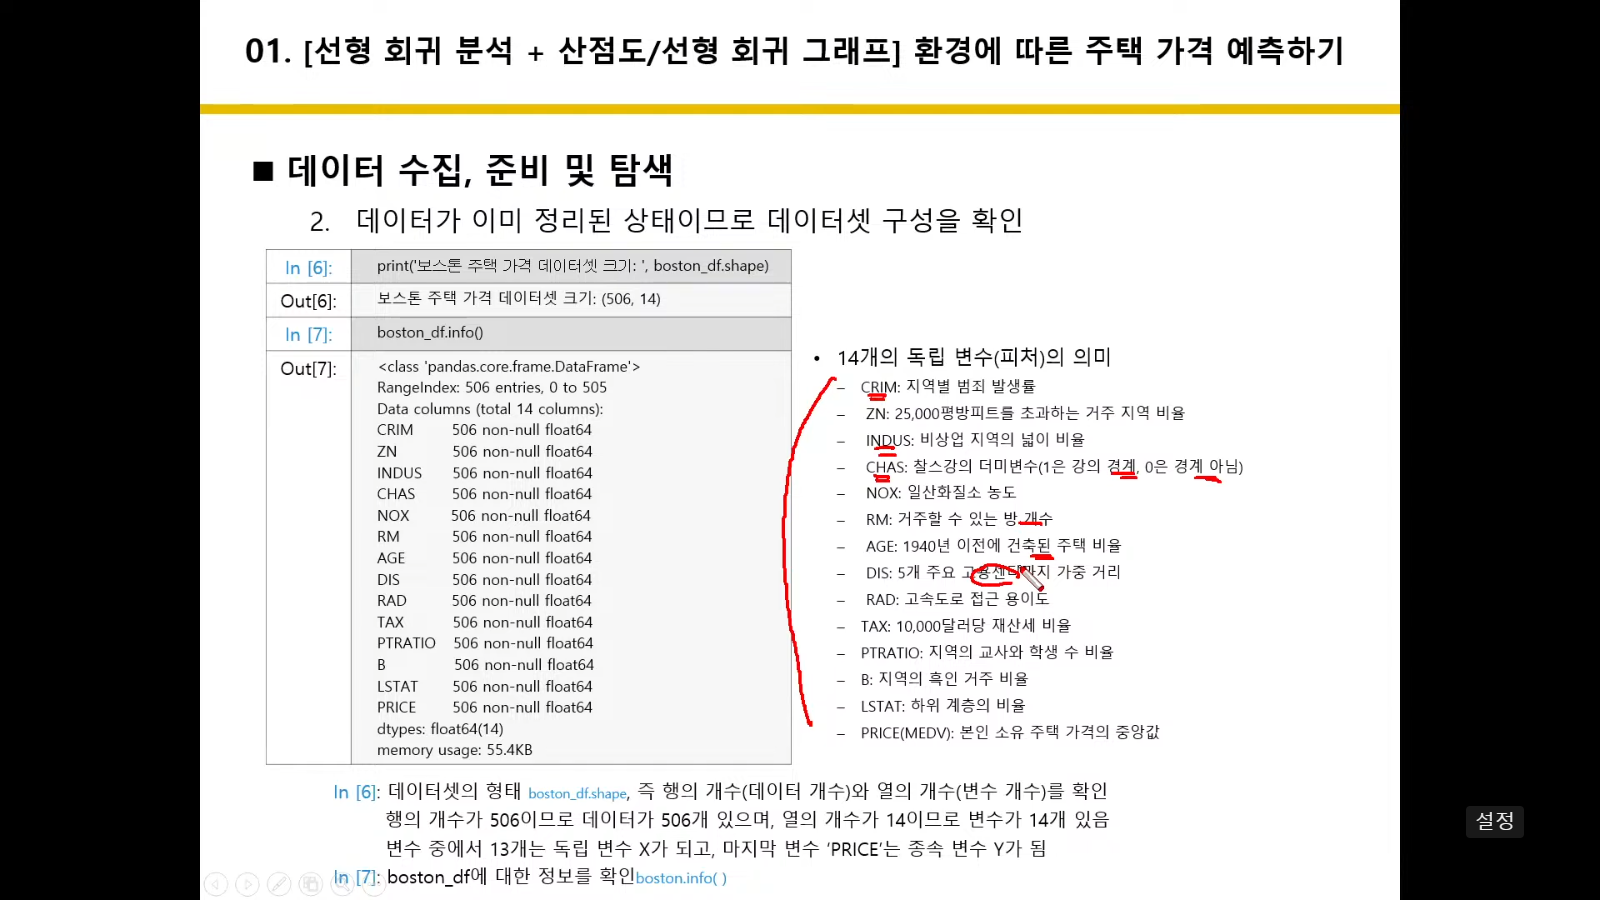

In [43]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [46]:
x = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)
lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)

In [4]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('mse : {:.3f}, rmse : {:.3f}'.format(mse, rmse))

mse : 17.297, rmse : 4.159


In [51]:
lr.coef_, lr.intercept_

(array([-1.12979614e-01,  6.55124002e-02,  3.44366694e-02,  3.04589777e+00,
        -1.97958320e+01,  3.35496880e+00,  5.93713290e-03, -1.74185354e+00,
         3.55884364e-01, -1.42954516e-02, -9.20180066e-01,  1.03966156e-02,
        -5.66182106e-01]),
 40.99559517216412)

In [52]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)

RM          3.35
CHAS        3.05
RAD         0.36
ZN          0.07
INDUS       0.03
AGE         0.01
B           0.01
TAX        -0.01
CRIM       -0.11
LSTAT      -0.57
PTRATIO    -0.92
DIS        -1.74
NOX       -19.80
dtype: float64

In [53]:
x

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

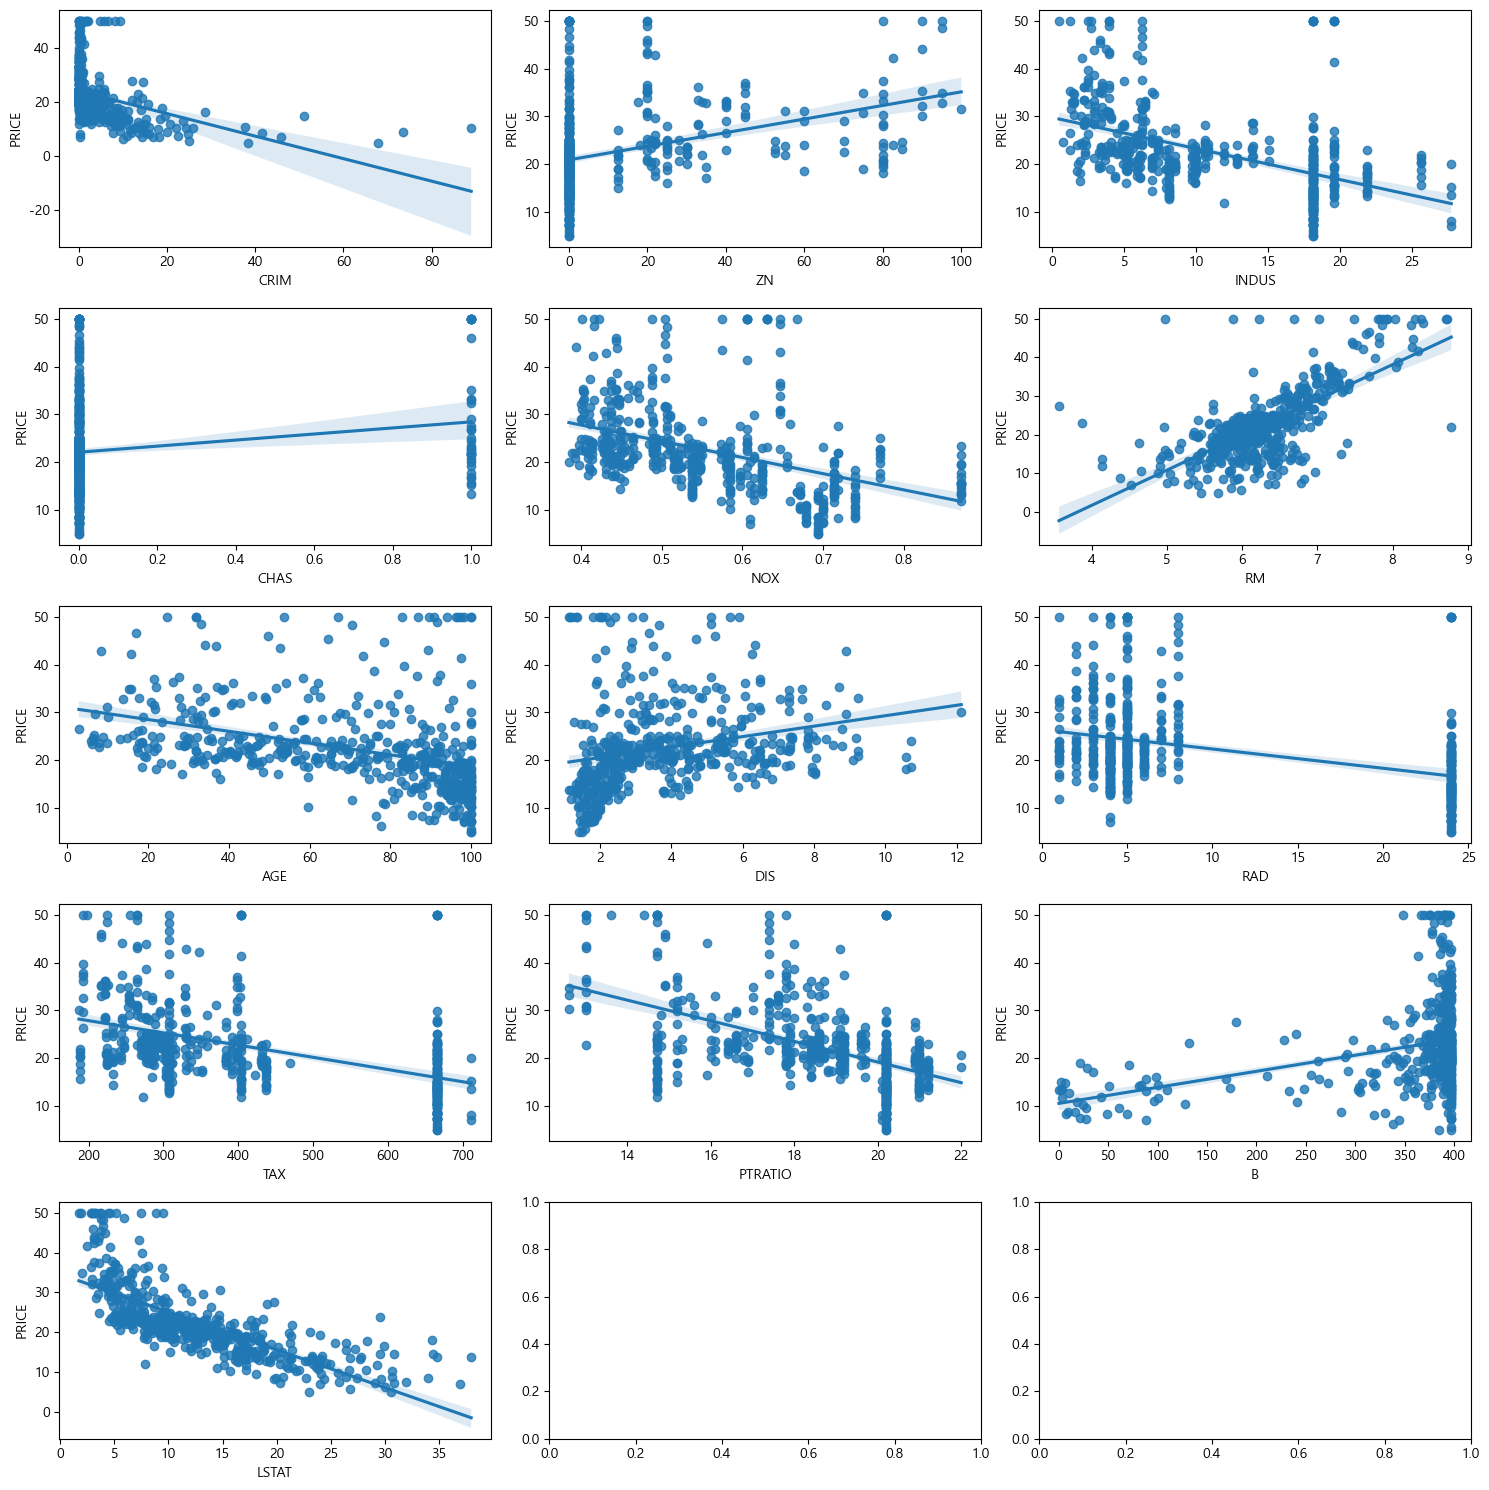

In [55]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
x_features = x.columns

for i, feature in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axes[row][col])
plt.tight_layout()
plt. show()

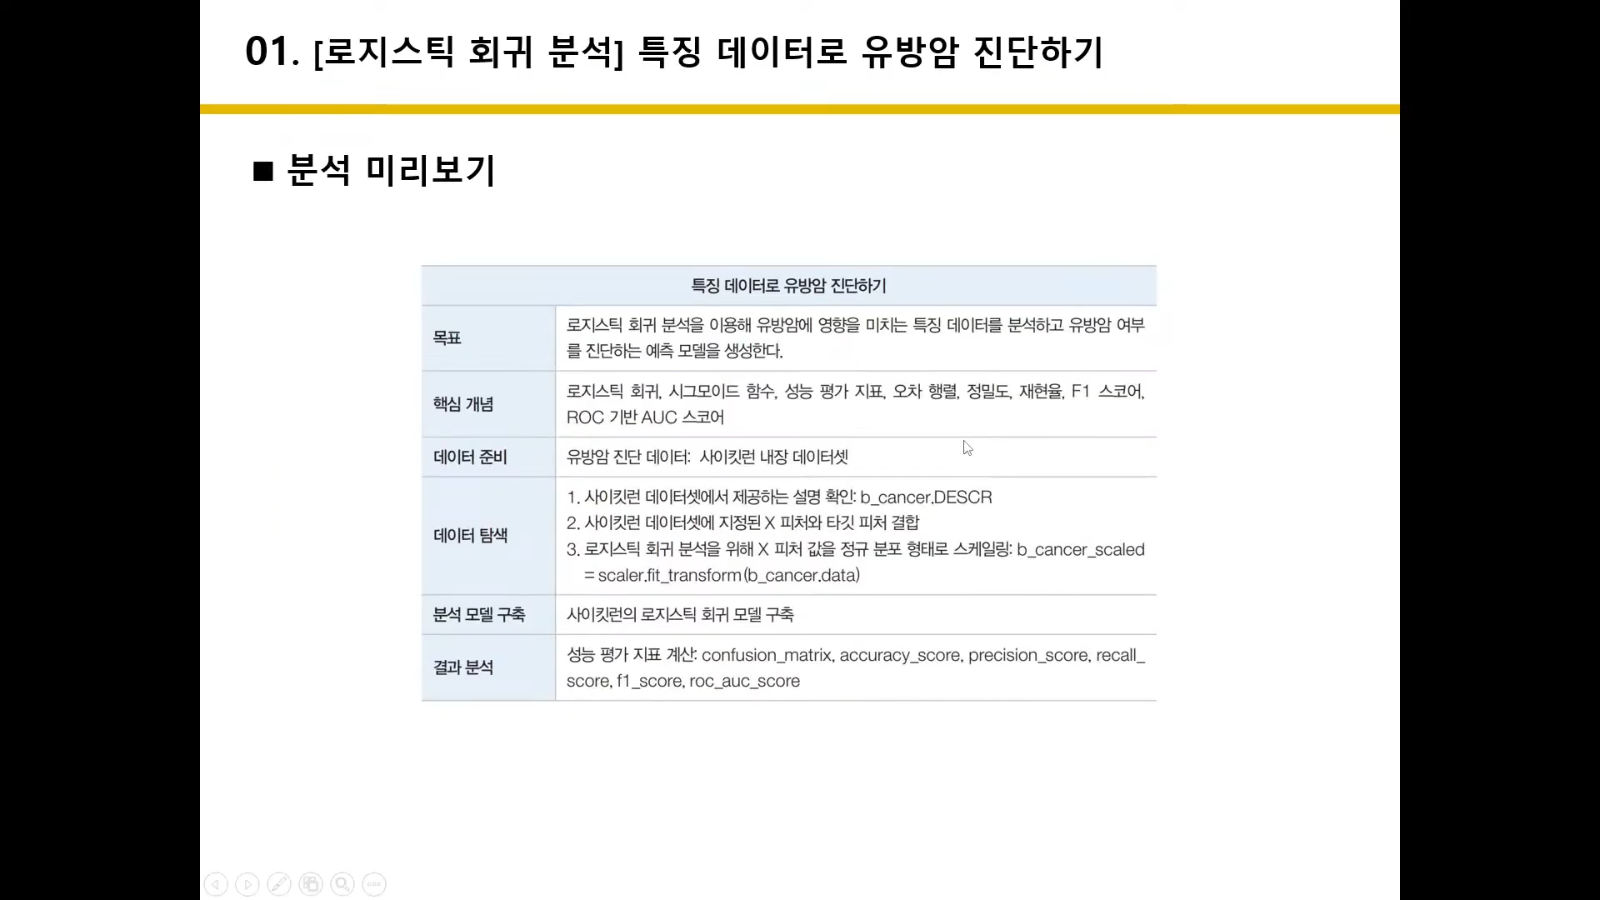

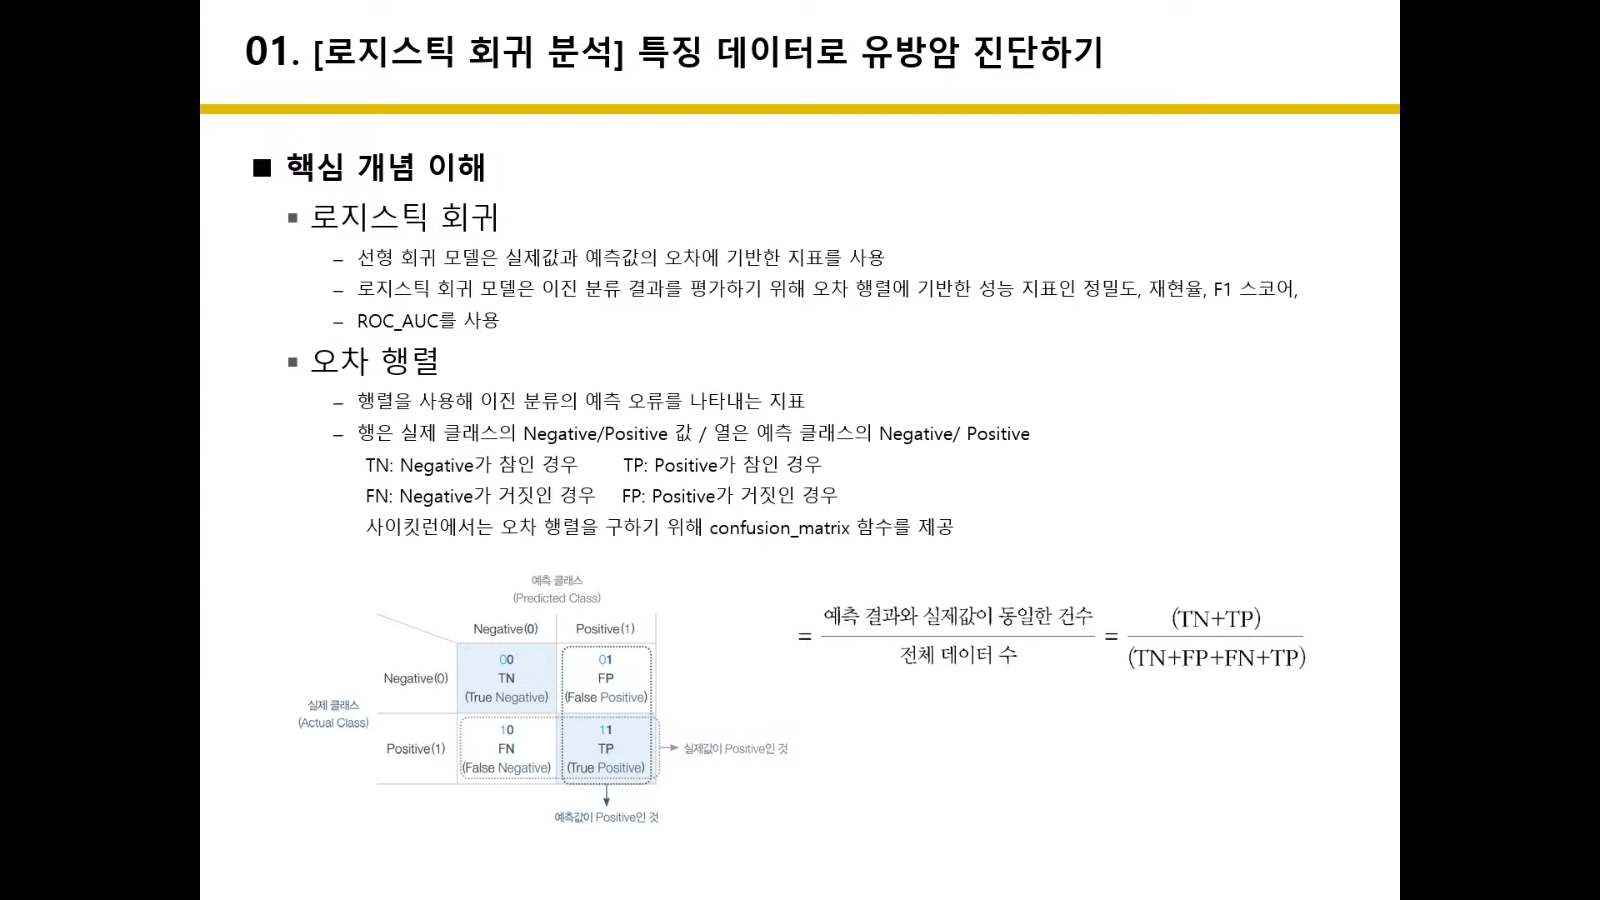

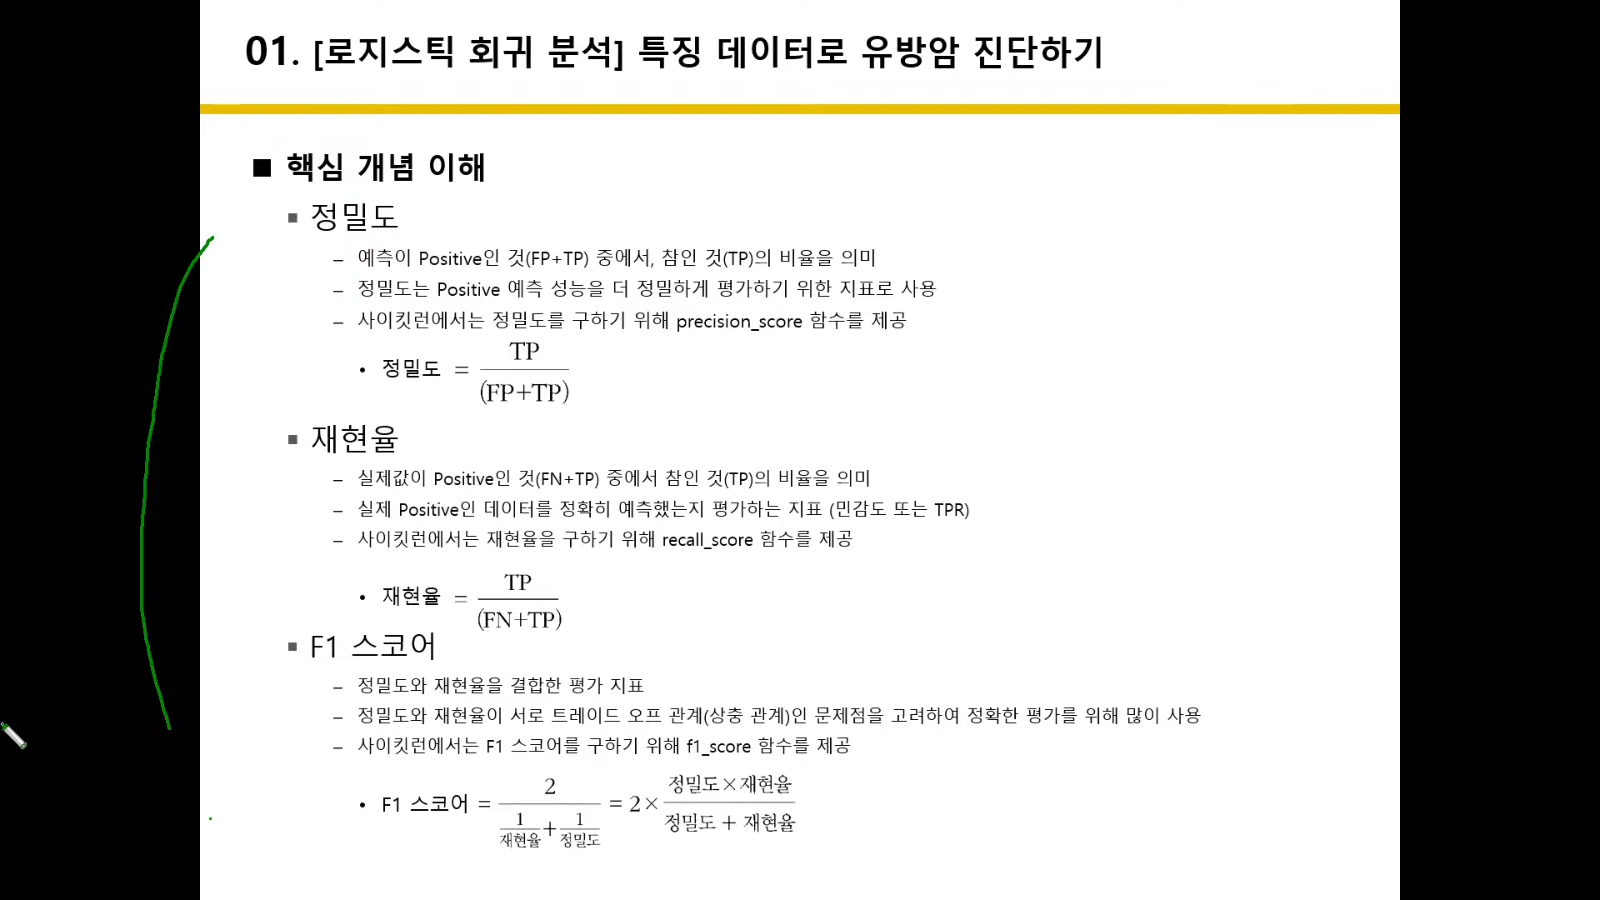

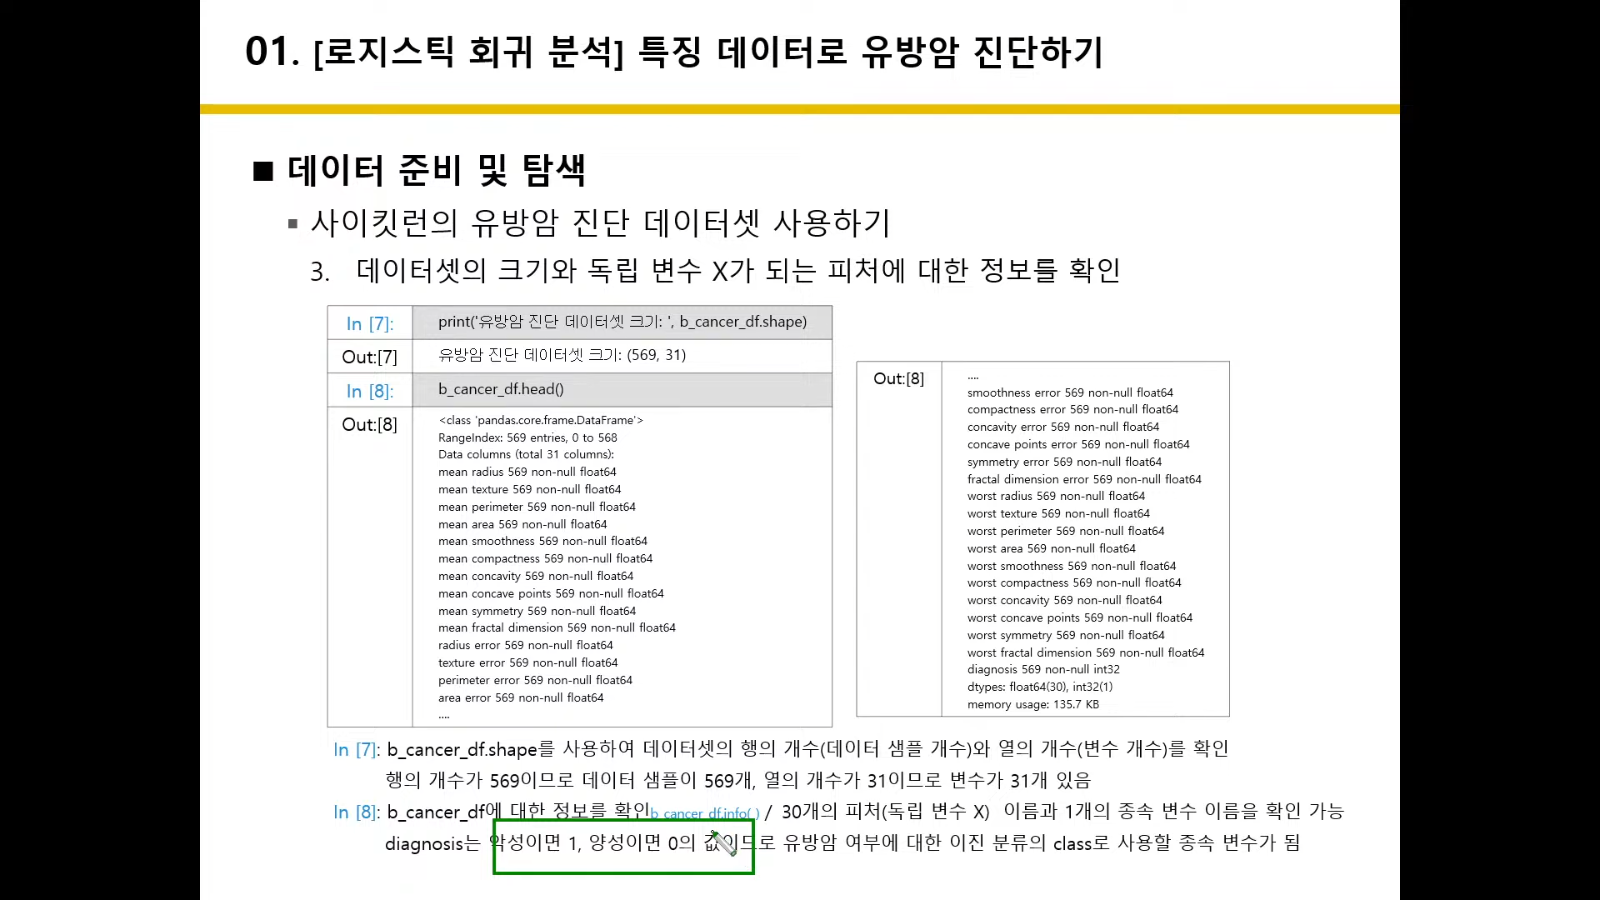

In [5]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['diagnosis'] = cancer.target
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
from sklearn.preprocessing import StandardScaler

각 특성치 범위 차이가 많이 나면 scale 작업을 해주는 것이 좋다. scaler 의 종류로 standard scaler, min_max scaler, rubust scaler 등이 있는데, 뉴럴 네트워크 학습할 때 sigmoid 함수는  
0~1이 return 되므로 min_max scaler를 많이 쓰며, hyperbolic tangent 함수는 -1 ~1 값이 나와야 하므로 standard scaler 로 해주면 좋다. robust scaler를 평균대신 중앙값을 사용하는데 이상치에 민감하지 않게 scale 작업할 때 주로 쓰임

In [10]:
scaler = StandardScaler()
cancer_scaled = scaler.fit_transform(cancer.data)
x = cancer_scaled
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression

lr_cancer = LogisticRegression()
lr_cancer.fit(x_train, y_train)
y_predict = lr_cancer.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[ 60,   3],
       [  1, 107]], dtype=int64)

In [12]:
from sklearn.metrics import precision_score, recall_score

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('정확도:{:.3f}, 정밀도:{:.3f}, 재현율:{:.3f}'.format(accuracy, precision, recall))

정확도:0.977, 정밀도:0.973, 재현율:0.991


In [6]:
train = pd.read_csv('train_wine.csv')
test = pd.read_csv('test_wine.csv')
train.info() # 데이터의 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3231 non-null   int64  
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   float64
 12  type                  3231 non-null   object 
 13  quality               3231 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 353.5+ KB


In [59]:
train.isna().sum() # 이와 같이 결측치 확인도 가능

id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64

In [7]:
train.head() # type은 문자형이므로 나중에 변환해줘야 함

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            8.0              0.18         0.37             1.3   
1   2            7.5              0.38         0.29             4.9   
2   3            6.1              0.27         0.33             2.2   
3   4            6.4              0.32         0.50            10.7   
4   5            8.4              0.37         0.43             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.040                 15.0                  96.0  0.99120  3.06   
1      0.021                 38.0                 113.0  0.99026  3.08   
2      0.021                 26.0                 117.0  0.98860  3.12   
3      0.047                 57.0                 206.0  0.99680  3.08   
4      0.063                 12.0                  19.0  0.99550  3.17   

   sulphates  alcohol   type  quality  
0       0.61     12.1  white        6  
1       0.48     13.0  white        7  
2       0.30     12.5  white        6  
3       0.60      9.4  white        5  
4       0.81     11.2    red        7

In [8]:
test.head() # test 데이터에는 target 인 quality 가 없음

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            7.3              0.31         0.25            6.65   
1   2            8.7              0.70         0.24            2.50   
2   3            6.9              0.63         0.01            2.40   
3   4            6.3              0.23         0.50           10.40   
4   5            6.9              0.54         0.04            3.00   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.032                 30.0                 138.0  0.99244  2.90   
1      0.226                  5.0                  15.0  0.99910  3.32   
2      0.076                 14.0                  39.0  0.99522  3.34   
3      0.043                 61.0                 132.0  0.99542  2.86   
4      0.077                  7.0                  27.0  0.99870  3.69   

   sulphates  alcohol   type  
0       0.37     11.1  white  
1       0.60      9.0    red  
2       0.53     10.8    red  
3       0.46      9.1  white  
4       0.91      9.4    red

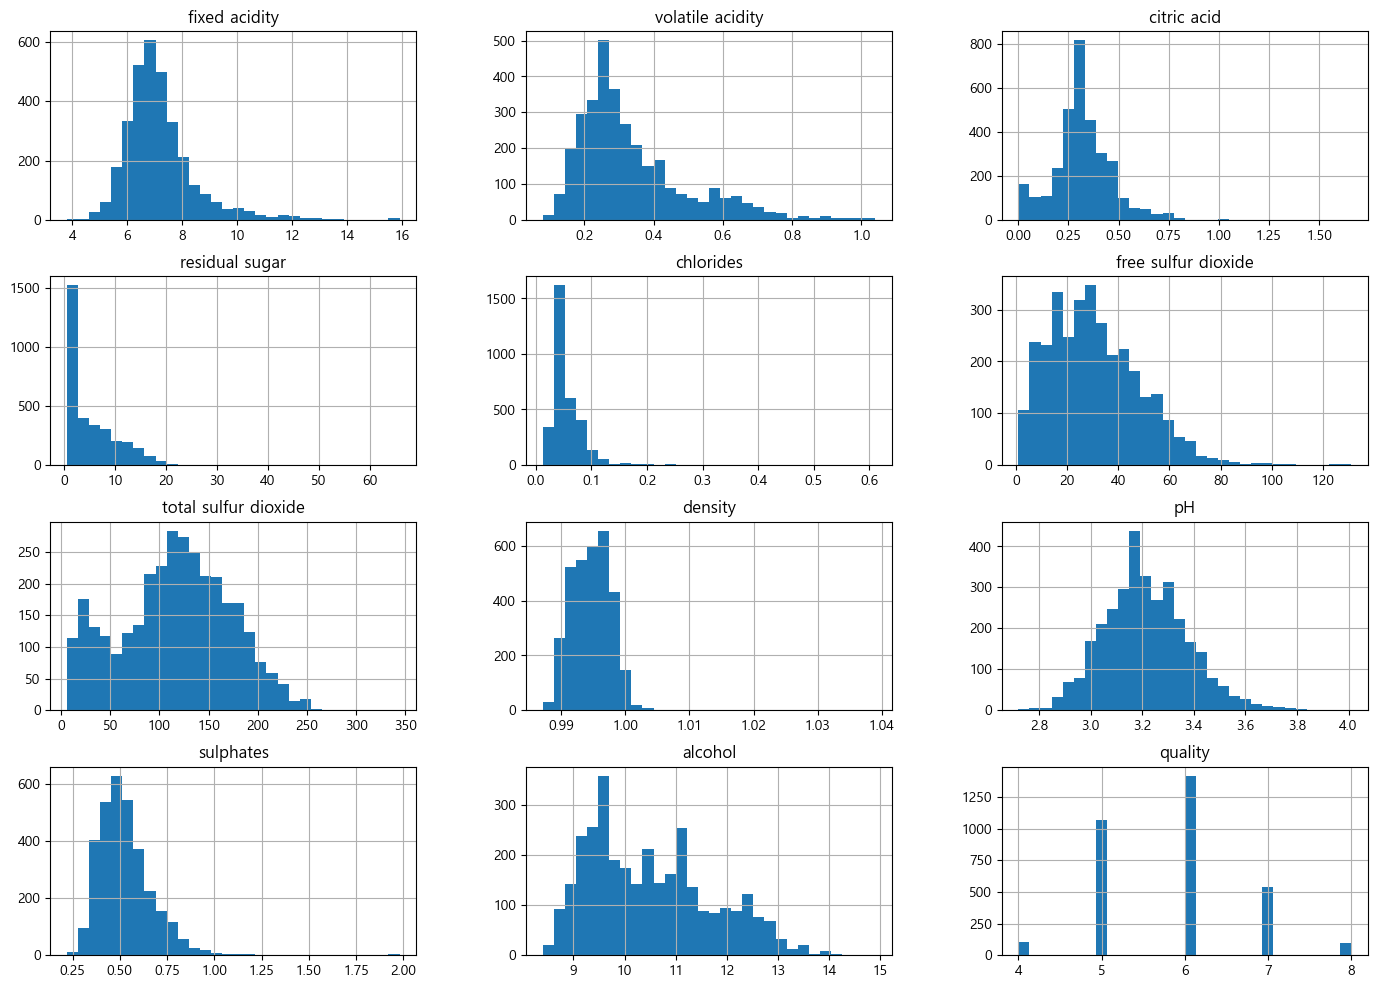

In [9]:
train.iloc[:, 1:].hist(bins=30, figsize=(17, 12)) # 데이터 속성별 분포도를 check 해봄
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])
train.head()

id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   1            8.0              0.18         0.37             1.3   
1   2            7.5              0.38         0.29             4.9   
2   3            6.1              0.27         0.33             2.2   
3   4            6.4              0.32         0.50            10.7   
4   5            8.4              0.37         0.43             2.3   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.040                 15.0                  96.0  0.99120  3.06   
1      0.021                 38.0                 113.0  0.99026  3.08   
2      0.021                 26.0                 117.0  0.98860  3.12   
3      0.047                 57.0                 206.0  0.99680  3.08   
4      0.063                 12.0                  19.0  0.99550  3.17   

   sulphates  alcohol  type  quality  
0       0.61     12.1     1        6  
1       0.48     13.0     1        7  
2       0.30     12.5     1        6  
3       0.60      9.4     1        5  
4       0.81     11.2     0        7

In [11]:
x_train = train.drop(['id', 'quality'], axis=1)
x_test = test.iloc[:, 1:]
y_train = train['quality']
x_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            8.0              0.18         0.37             1.3      0.040   
1            7.5              0.38         0.29             4.9      0.021   
2            6.1              0.27         0.33             2.2      0.021   
3            6.4              0.32         0.50            10.7      0.047   
4            8.4              0.37         0.43             2.3      0.063   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 15.0                  96.0  0.99120  3.06       0.61   
1                 38.0                 113.0  0.99026  3.08       0.48   
2                 26.0                 117.0  0.98860  3.12       0.30   
3                 57.0                 206.0  0.99680  3.08       0.60   
4                 12.0                  19.0  0.99550  3.17       0.81   

   alcohol  type  
0     12.1     1  
1     13.0     1  
2     12.5     1  
3      9.4     1  
4     11.2     0

In [12]:
from sklearn.tree import DecisionTreeClassifier

## Decision Tree의 파라미터의 의미
 - max_depth : 트리의 최대 깊이
 - min_sample_leaf : 마지막 노드(leaf)에서 최소 몇개 이상의 샘플이 있을 때 leaf를 만듬
 - min_sample_split : 해당 노드에서 최소 몇개 이상의 샘플이 있을 때 분기하는 조건

In [13]:
df_clf = DecisionTreeClassifier() # 아무 파라미터 값이 없이 decision tree 만들면 과하게 fitting 해서 모델을 만들게 됨
df_clf.fit(x_train, y_train)
df_clf.score(x_train, y_train)

1.0

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[3,5,7,9],
             'min_samples_split':[1,3,5],
             'min_samples_leaf':[1,3,5]}
gs = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1) # cv=5의 의미는 자체적으로 데이터를 5개 구간으로 나눠서 1개를 test로 나눠서 쓰기 위한 설정임
result = gs.fit(x_train, y_train)

print('최적 파라미터:', gs.best_params_)
print('최적 점수:', gs.best_score_)
print(result.best_estimator_)

최적 파라미터: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 3}
최적 점수: 0.5444169565654293
DecisionTreeClassifier(max_depth=9, min_samples_split=3)


C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(som

In [67]:
gs.cv_results_ # 모델 돌린 결과치를 다 보여줌

{'mean_fit_time': array([0.0029994 , 0.00639963, 0.0089994 , 0.00299926, 0.00699916,
        0.00679946, 0.00400043, 0.00619893, 0.00619912, 0.00199986,
        0.00799966, 0.00859919, 0.00319972, 0.00819893, 0.00839953,
        0.00279984, 0.01219931, 0.00779877, 0.00619984, 0.01199956,
        0.01299953, 0.00239987, 0.01379914, 0.0137989 , 0.00200005,
        0.01219902, 0.01879869, 0.00220003, 0.01639776, 0.01539869,
        0.00360074, 0.0149991 , 0.01739907, 0.0032001 , 0.01519866,
        0.01399903]),
 'std_fit_time': array([6.31882440e-04, 1.49675203e-03, 1.67260068e-03, 1.09523541e-03,
        1.41414504e-03, 1.72083425e-03, 3.51995719e-03, 1.16641715e-03,
        1.46984049e-03, 1.09558337e-03, 7.68876815e-07, 1.35603029e-03,
        1.46913989e-03, 1.16663751e-03, 1.35614981e-03, 1.72048471e-03,
        8.42334762e-03, 7.47653273e-04, 8.42337365e-03, 1.41427988e-03,
        3.03275752e-03, 1.85511894e-03, 5.63616234e-03, 6.14480970e-03,
        6.32410095e-04, 1.93943316e-0

In [56]:
pd.DataFrame(gs.cv_results_).sort_values(by='mean_test_score', ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
28       0.013999      0.001674         0.001200        0.000400   
20       0.012399      0.003826         0.001400        0.000490   
29       0.014599      0.001855         0.001201        0.000400   
19       0.010399      0.000489         0.001201        0.000400   
32       0.015000      0.001414         0.001800        0.001166   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
28               9                      1                       3   
20               7                      1                       5   
29               9                      1                       5   
19               7                      1                       3   
32               9                      3                       5   

                                               params  split0_test_score  \
28  {'max_depth': 9, 'min_samples_leaf': 1, 'min_s...           0.537867   
20  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...           0.513138   
29  {'max_depth': 9, 'min_samples_leaf': 1, 'min_s...           0.537867   
19  {'max_depth': 7, 'min_samples_leaf': 1, 'min_s...           0.506955   
32  {'max_depth': 9, 'min_samples_leaf': 3, 'min_s...           0.533230   

    split1_test_score  split2_test_score  split3_test_score  \
28           0.577399           0.529412           0.540248   
20           0.574303           0.544892           0.543344   
29           0.572755           0.535604           0.534056   
19           0.575851           0.541796           0.544892   
32           0.566563           0.526316           0.538700   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
28           0.535604         0.544106        0.017032                1  
20           0.541796         0.543494        0.019368                2  
29           0.535604         0.543177        0.014839                3  
19           0.541796         0.542258        0.021827                4  
32           0.537152         0.540392        0.013768                5

In [15]:
dt_model = gs.best_estimator_
dt_model.fit(x_train, y_train)
dt_model.score(x_train, y_train) # train 데이터로만 점수를 내서 아까보다는 좋게 나옴

0.7462086041473228

In [70]:
for name, value in zip(x_train.columns, dt_model.feature_importances_): #dt_model의 feature_importnaces_ 값을 통해 해당 모델에 feature가 얼마나 영향을 끼쳤는지 볼 수 있음
    print(f'{name}:{value:.3f}')

fixed acidity:0.062
volatile acidity:0.144
citric acid:0.067
residual sugar:0.067
chlorides:0.054
free sulfur dioxide:0.069
total sulfur dioxide:0.081
density:0.054
pH:0.097
sulphates:0.059
alcohol:0.247
type:0.000


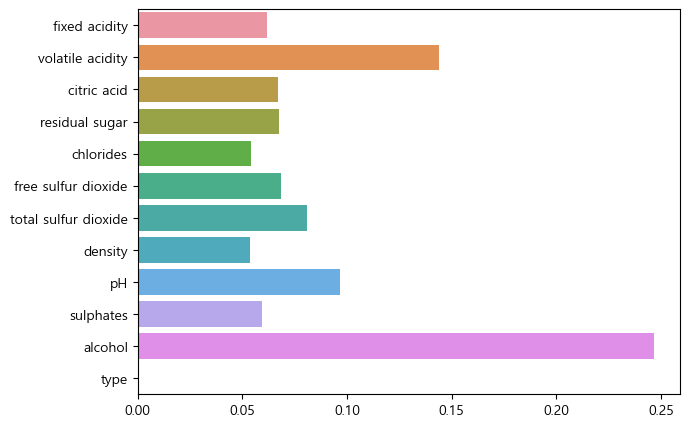

In [71]:
plt.figure(figsize=(7,5))
sns.barplot(x=dt_model.feature_importances_, y = x_train.columns)
plt.show()

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svc_model = SVC()
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

voting_model = VotingClassifier(
    estimators = [('svc', svc_model), ('knn', knn_model), ('dt', dt_model)],
    voting = 'hard', # hard 방식(직접 투표)임
    n_jobs=-1
)

for model in (svc_model, knn_model, dt_model, voting_model):
    model.fit(x_train, y_train)
    print(model.__class__.__name__, ':', model.score(x_train, y_train))

SVC : 0.44351593933766637
KNeighborsClassifier : 0.6406685236768802
DecisionTreeClassifier : 1.0


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


VotingClassifier : 0.7889198390591148


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svc_model = SVC(probability=True) # soft 방식으로 하기 위한 설정
knn_model = KNeighborsClassifier()
dt_model = DecisionTreeClassifier()

voting_model = VotingClassifier(
    estimators = [('svc', svc_model), ('knn', knn_model), ('dt', dt_model)],
    voting = 'soft',
    n_jobs=-1
)

for model in (svc_model, knn_model, dt_model, voting_model):
    model.fit(x_train, y_train)
    print(model.__class__.__name__, ':', model.score(x_train, y_train))

SVC : 0.44351593933766637
KNeighborsClassifier : 0.6406685236768802
DecisionTreeClassifier : 1.0


C:\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


VotingClassifier : 0.9987619931909626


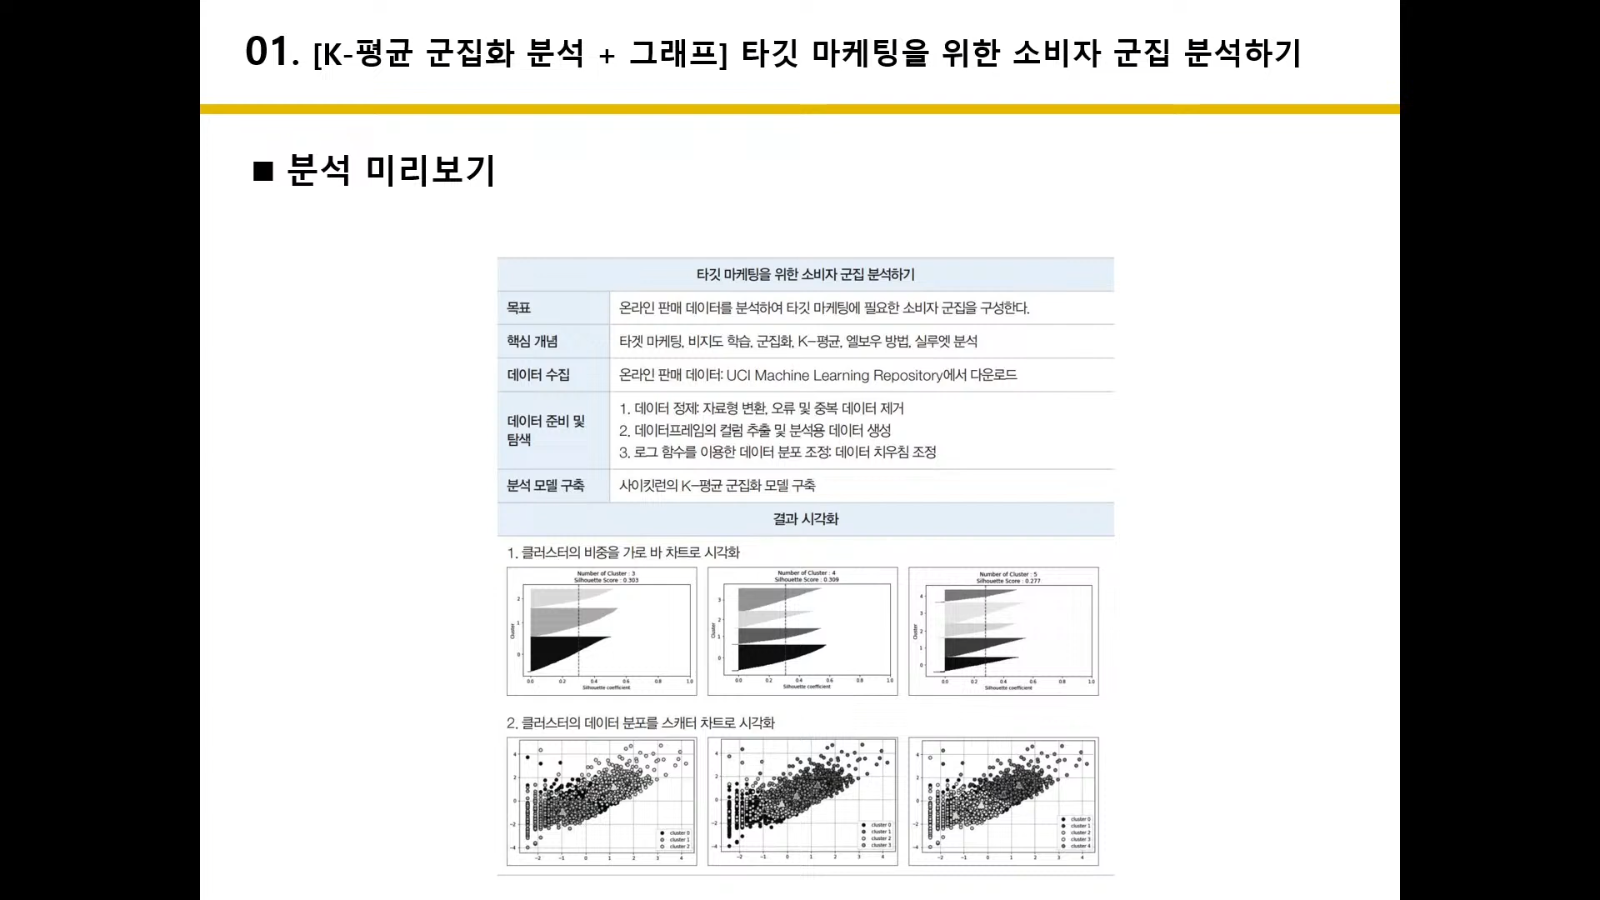

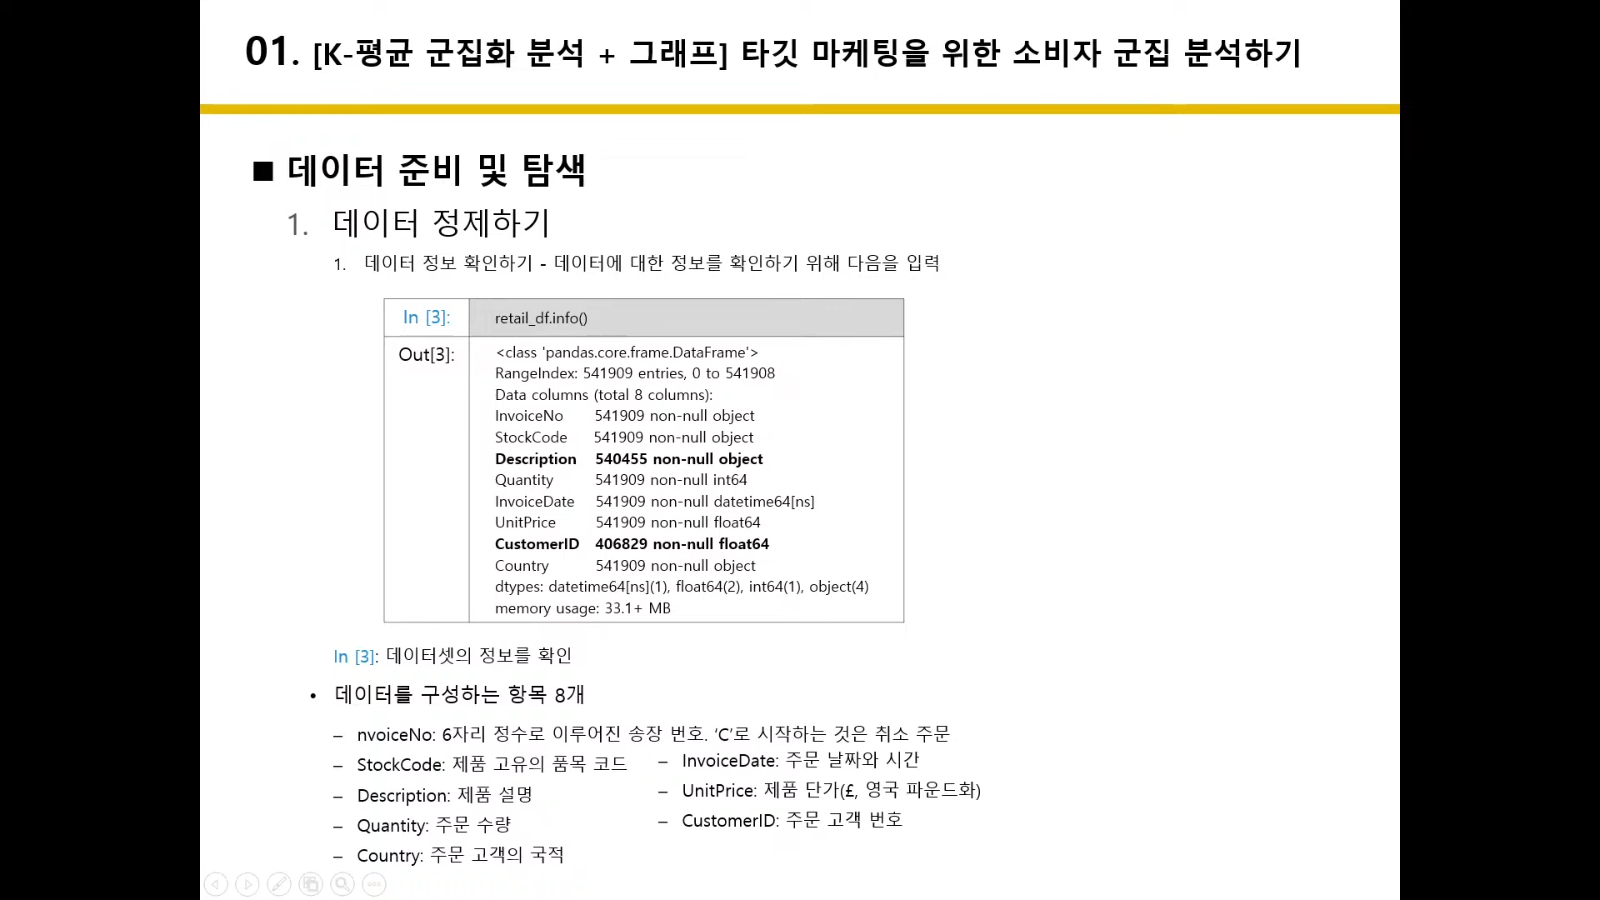

In [52]:
retail_df = pd.read_excel('Online_Retail.xlsx', engine='openpyxl')

In [53]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [54]:
retail_df.info() # customerID, Description에 결측치가 보이고 Unit Price, Quantity에 음수가 있는데 이건 환불한 내역임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [55]:
retail_df = retail_df[retail_df['Quantity'] > 0] # Quantity가 0 보다 큰 것만 선택
retail_df = retail_df[retail_df['UnitPrice'] > 0] # 가격이 0 보다 큰 것만 선택
retail_df = retail_df[retail_df['CustomerID'].notnull()] # CustomID에 값이 있는 것만 선택

retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [56]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [57]:
retail_df.drop_duplicates(inplace=True)
retail_df.shape

(392692, 8)

In [58]:
pd.DataFrame([{'product':len(retail_df['StockCode'].unique()),
              'transaction':len(retail_df['InvoiceNo'].unique()),
               'customer':len(retail_df['CustomerID'].unique()),}],
            columns=['product', 'transaction', 'customer'],
             index=['counts'])

product  transaction  customer
counts     3665        18532      4338

In [59]:
retail_df['SaleAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

          InvoiceDate  UnitPrice  CustomerID         Country  SaleAmount  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00

In [60]:
customer_df = retail_df.groupby('CustomerID').agg({'InvoiceNo':'count',
                                                  'SaleAmount':'sum',
                                                  'InvoiceDate':'max'}).reset_index()
customer_df

CustomerID  InvoiceNo  SaleAmount         InvoiceDate
0          12346          1    77183.60 2011-01-18 10:01:00
1          12347        182     4310.00 2011-12-07 15:52:00
2          12348         31     1797.24 2011-09-25 13:13:00
3          12349         73     1757.55 2011-11-21 09:51:00
4          12350         17      334.40 2011-02-02 16:01:00
...          ...        ...         ...                 ...
4333       18280         10      180.60 2011-03-07 09:52:00
4334       18281          7       80.82 2011-06-12 10:53:00
4335       18282         12      178.05 2011-12-02 11:43:00
4336       18283        721     2045.53 2011-12-06 12:02:00
4337       18287         70     1837.28 2011-10-28 09:29:00

[4338 rows x 4 columns]

In [61]:
customer_df = customer_df.rename(columns={'InvoiceNo':'Freq', 'InvoiceDate':'ElapsedDays'})
customer_df

CustomerID  Freq  SaleAmount         ElapsedDays
0          12346     1    77183.60 2011-01-18 10:01:00
1          12347   182     4310.00 2011-12-07 15:52:00
2          12348    31     1797.24 2011-09-25 13:13:00
3          12349    73     1757.55 2011-11-21 09:51:00
4          12350    17      334.40 2011-02-02 16:01:00
...          ...   ...         ...                 ...
4333       18280    10      180.60 2011-03-07 09:52:00
4334       18281     7       80.82 2011-06-12 10:53:00
4335       18282    12      178.05 2011-12-02 11:43:00
4336       18283   721     2045.53 2011-12-06 12:02:00
4337       18287    70     1837.28 2011-10-28 09:29:00

[4338 rows x 4 columns]

In [62]:
import datetime
customer_df['ElapsedDays'] = datetime.datetime(2011, 12, 31) - customer_df['ElapsedDays']
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x:x.days + 1)
customer_df.head()

CustomerID  Freq  SaleAmount  ElapsedDays
0       12346     1    77183.60          347
1       12347   182     4310.00           24
2       12348    31     1797.24           97
3       12349    73     1757.55           40
4       12350    17      334.40          332

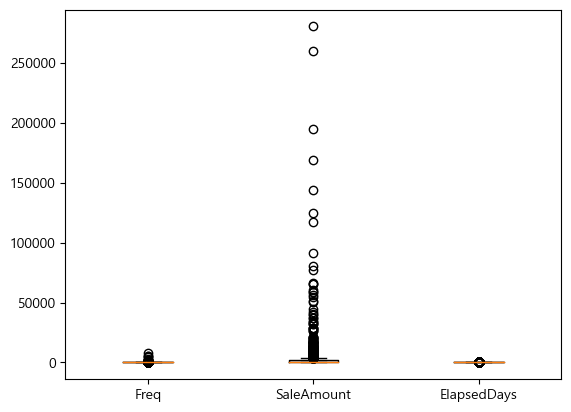

In [63]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq'], customer_df['SaleAmount'], customer_df['ElapsedDays']])
plt.xticks([1, 2, 3], ['Freq', 'SaleAmount', 'ElapsedDays'])
plt.show()

In [64]:
# 데이터범위의 차이가 커서 log를 씌워줌
customer_df['Freq_log'] = np.log1p(customer_df['Freq'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

CustomerID  Freq  SaleAmount  ElapsedDays  Freq_log  SaleAmount_log  \
0       12346     1    77183.60          347  0.693147       11.253955   
1       12347   182     4310.00           24  5.209486        8.368925   
2       12348    31     1797.24           97  3.465736        7.494564   
3       12349    73     1757.55           40  4.304065        7.472245   
4       12350    17      334.40          332  2.890372        5.815324   

   ElapsedDays_log  
0         5.852202  
1         3.218876  
2         4.584967  
3         3.713572  
4         5.808142

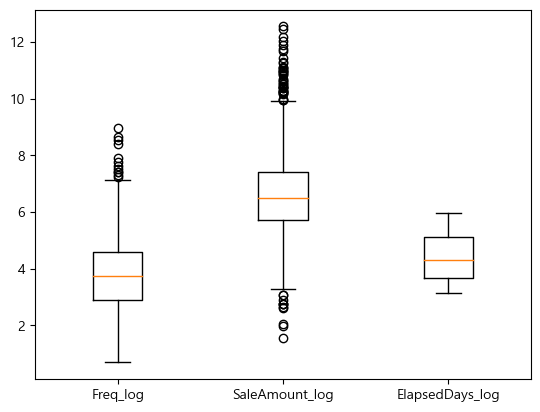

In [65]:
fig, ax = plt.subplots()
ax.boxplot([customer_df['Freq_log'], customer_df['SaleAmount_log'], customer_df['ElapsedDays_log']])
plt.xticks([1, 2, 3], ['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

In [66]:
x_features = customer_df[['Freq_log', 'SaleAmount_log', 'ElapsedDays']].values
x_features_scaled = StandardScaler().fit_transform(x_features)
x_features_scaled

array([[-2.43820181,  3.7077163 ,  2.32938811],
       [ 1.18898578,  1.41490344, -0.90058811],
       [-0.21146474,  0.72002428, -0.17059349],
       ...,
       [-0.9349095 , -1.11333158, -0.85058848],
       [ 2.29130702,  0.82281217, -0.89058819],
       [ 0.42858139,  0.73752572, -0.50059106]])

In [67]:
from sklearn.cluster import KMeans

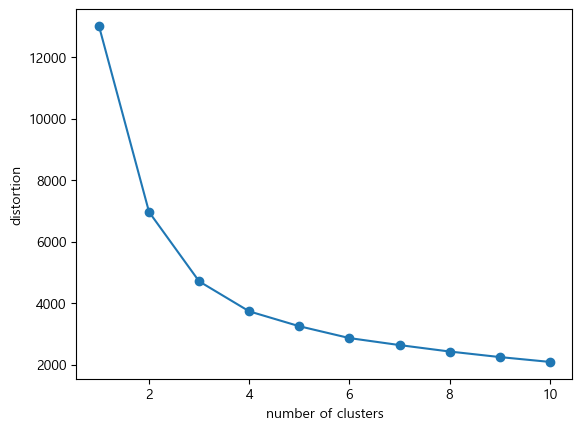

In [68]:
distortions = []

for i in range(1, 11):
    k_means_i = KMeans(n_clusters=i, random_state=0)
    k_means_i.fit(x_features_scaled)
    distortions.append(k_means_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.show()

In [69]:
from matplotlib import cm

def clusterScatter(n_cluster, X_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) # 클러스터의 색상 설정
        c_colors.append(c_color)
        # 클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i, 0], X_features[Y_labels == i, 1],
                   marker='o', color=c_color, edgecolors='black', s=50, label='cluster'+str(i))
    # 각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i, 0], kmeans.cluster_centers_[i, 1], marker='^', color=c_colors[i], edgecolors='w', s=200)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

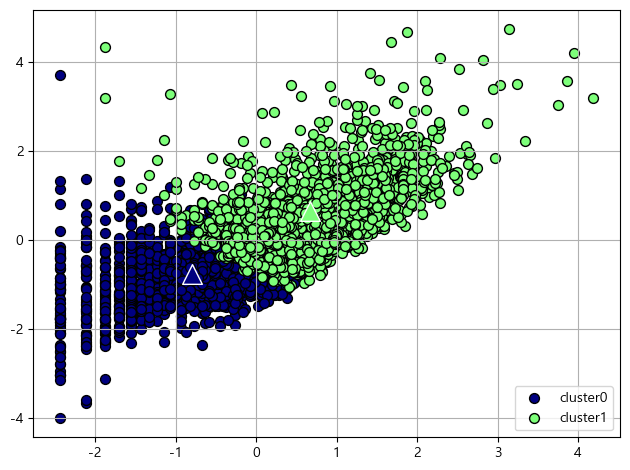

In [70]:
clusterScatter(2, x_features_scaled)

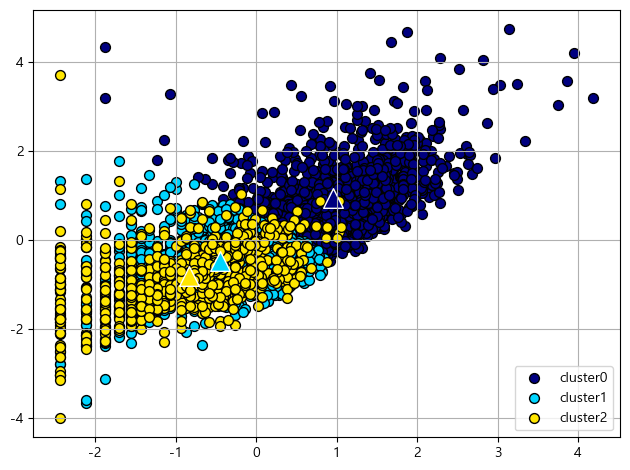

In [71]:
clusterScatter(3, x_features_scaled)

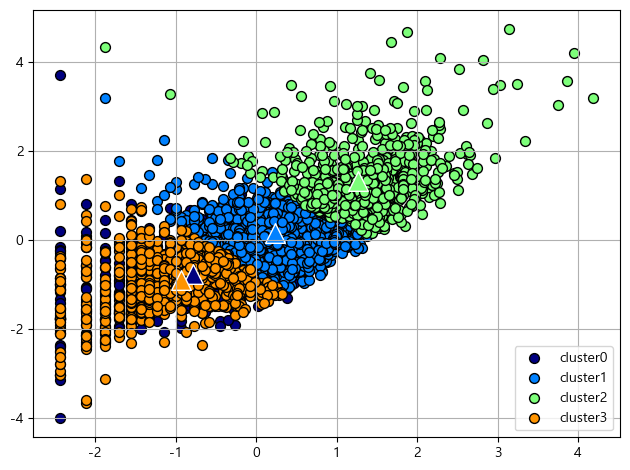

In [72]:
clusterScatter(4, x_features_scaled)

In [73]:
# 군집을 4개로 만든다고 가정하고
kmeans = KMeans(n_clusters=4, random_state=0)
y_labels = kmeans.fit_predict(x_features_scaled)
customer_df['ClusterLabel'] = y_labels
customer_df.head()

CustomerID  Freq  SaleAmount  ElapsedDays  Freq_log  SaleAmount_log  \
0       12346     1    77183.60          347  0.693147       11.253955   
1       12347   182     4310.00           24  5.209486        8.368925   
2       12348    31     1797.24           97  3.465736        7.494564   
3       12349    73     1757.55           40  4.304065        7.472245   
4       12350    17      334.40          332  2.890372        5.815324   

   ElapsedDays_log  ClusterLabel  
0         5.852202             0  
1         3.218876             2  
2         4.584967             1  
3         3.713572             1  
4         5.808142             0

In [74]:
customer_cluster_df = customer_df.drop(['Freq_log', 'SaleAmount_log', 'ElapsedDays_log'], axis=1)
customer_cluster_df['SaleAmountAvg'] = customer_cluster_df['SaleAmount'] / customer_cluster_df['Freq']
customer_cluster_df

CustomerID  Freq  SaleAmount  ElapsedDays  ClusterLabel  SaleAmountAvg
0          12346     1    77183.60          347             0   77183.600000
1          12347   182     4310.00           24             2      23.681319
2          12348    31     1797.24           97             1      57.975484
3          12349    73     1757.55           40             1      24.076027
4          12350    17      334.40          332             0      19.670588
...          ...   ...         ...          ...           ...            ...
4333       18280    10      180.60          299             0      18.060000
4334       18281     7       80.82          202             0      11.545714
4335       18282    12      178.05           29             3      14.837500
4336       18283   721     2045.53           25             2       2.837074
4337       18287    70     1837.28           64             1      26.246857

[4338 rows x 6 columns]

In [75]:
customer_cluster_df.drop('CustomerID', axis=1).groupby('ClusterLabel').mean()
# 2번 군집은 자주 구매하는데 평균 구매액이 높지는 않은편, 0번 군집은 구매횟수는 작지만, 한번 구매할 때 많이 구매하는 편으로 확인됨

Freq   SaleAmount  ElapsedDays  SaleAmountAvg
ClusterLabel                                                     
0              21.363946   459.729637   286.297052     126.221696
1              63.383449  1057.320361    75.296905      33.859998
2             274.504237  6914.956696    47.994703      95.597225
3              15.480086   301.690098    83.717976      44.636858

In [76]:
data_df = pd.read_csv('auto-mpg.csv')
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [78]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1)
data_df.head()

mpg  cylinders  displacement  weight  acceleration  model_year
0  18.0          8         307.0    3504          12.0          70
1  15.0          8         350.0    3693          11.5          70
2  18.0          8         318.0    3436          11.0          70
3  16.0          8         304.0    3433          12.0          70
4  17.0          8         302.0    3449          10.5          70

In [79]:
x = data_df.drop('mpg', axis=1)
y = data_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_test)

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

print('mse : {:.3f}  rmse : {:.3f}'.format(mse, rmse))

mse : 11.491  rmse : 3.390


In [80]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=x.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.21
displacement    0.01
weight         -0.01
cylinders      -0.17
dtype: float64

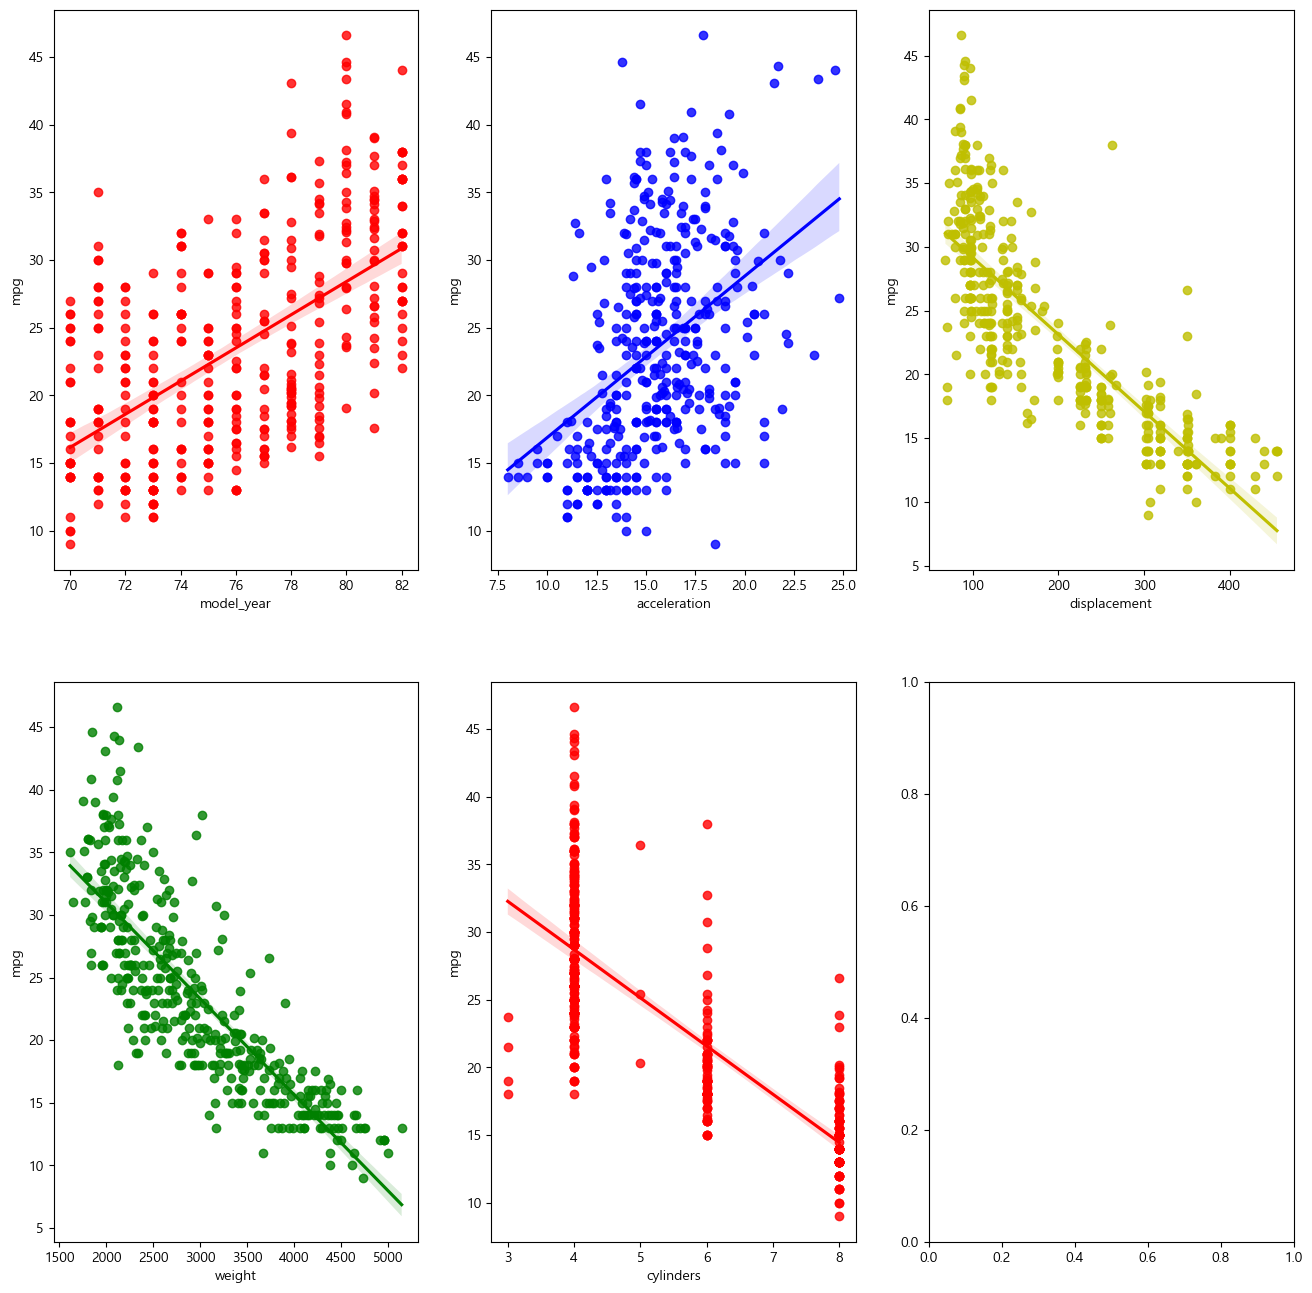

In [84]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = list('rbygr')

for i, feature in enumerate(x_features):
    row = i // 3
    col = i % 3
    sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])
plt.show()

In [85]:
print('연비 예측 -> 차의 정보를 입력하세요.')
cylinders_s = int(input('cylinders : '))
displacement_s = int(input('displacement : '))
weight_s = int(input('weight : '))
accelation_s = int(input('accelation : '))
model_year_s = int(input('model_year : '))

연비 예측 -> 차의 정보를 입력하세요.
cylinders : 80
displacement : 300
weight : 3000
accelation : 20
model_year : 99


In [86]:
mpg_predict = lr.predict([[cylinders_s, displacement_s, weight_s, accelation_s, model_year_s]])

print('예상 연비(mpg)는 %.2f 입니다.'%mpg_predict)

예상 연비(mpg)는 29.96 입니다.


C:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
